<a href="https://colab.research.google.com/github/DXTDL/MLDM-2023/blob/main/04-regularization/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

In this example we'll try to predict housing prices.

In [2]:
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [7]:
raw_df = pd.read_csv('BostonHousing.csv')
print(raw_df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [12]:
Y = raw_df['medv']
X = raw_df.drop('medv', axis = 1)

Information about the dataset:

In [16]:
# print(data.DESCR)

# Exploring the data

Let's just see how the target depends on individual features.

<ipython-input-19-a3b6dcb19fa1>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, x) in enumerate(X.iteritems(), 1):


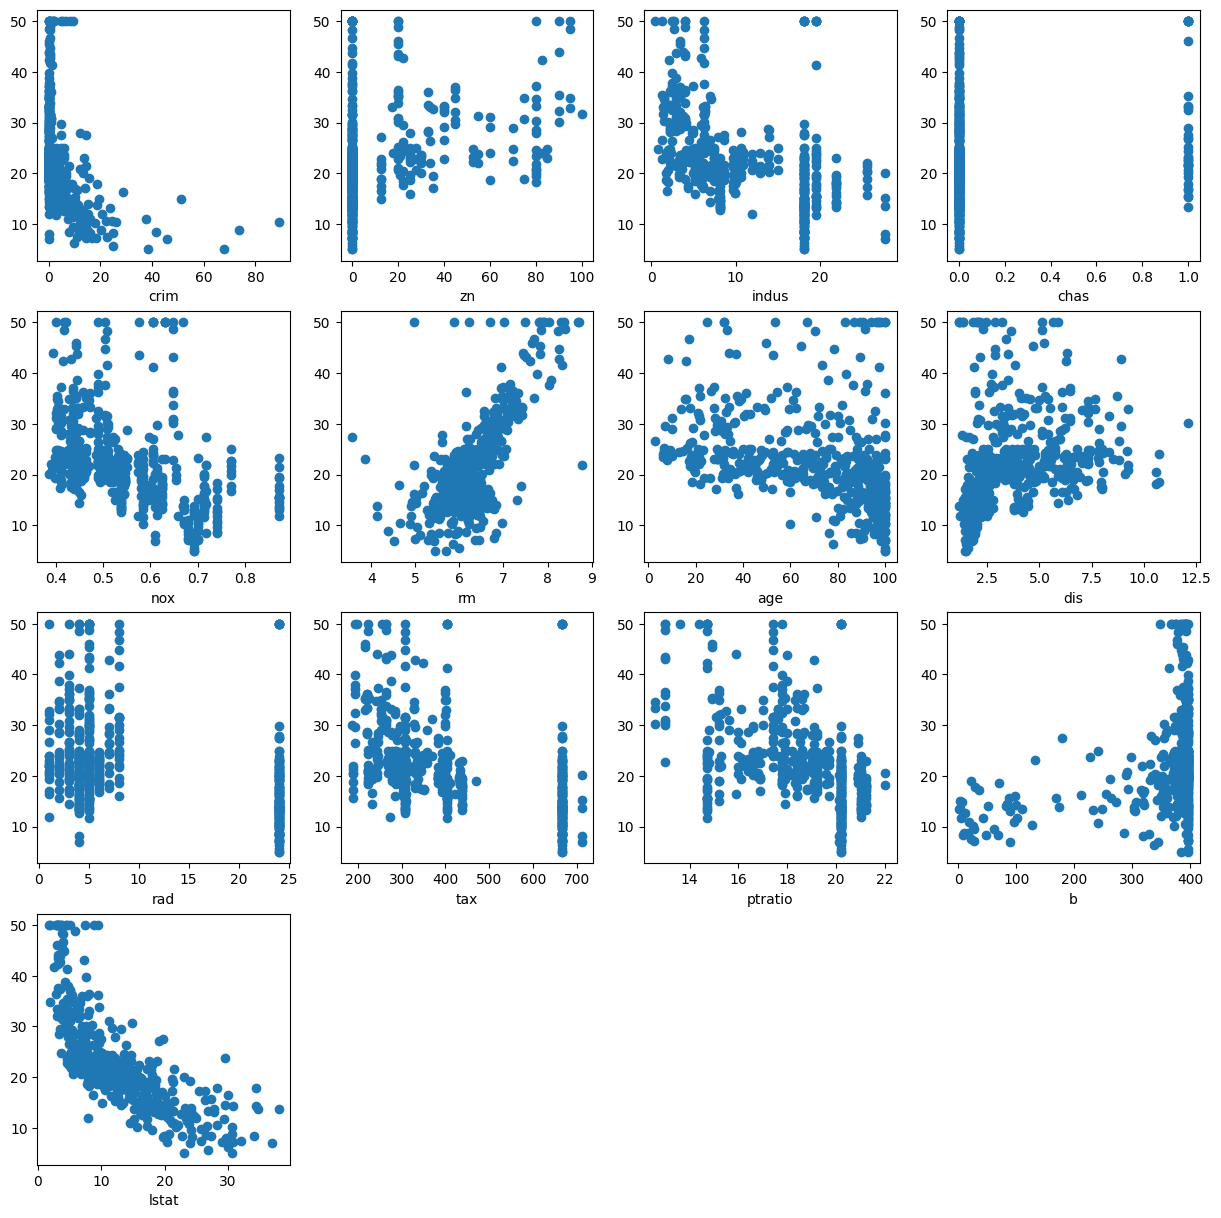

In [19]:
plt.figure(figsize=(15, 15))

grid_size = int(np.ceil(X.shape[1]**0.5))

for i, (name, x) in enumerate(X.iteritems(), 1):
  plt.subplot(grid_size, grid_size, i)
  plt.scatter(x, y)
  plt.xlabel(name)

Let's start by trying a simple linear regression model on the features with the most obvious correlation with the target. We'll also scale the features manually.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [22]:
old_columns = X.columns
print(old_columns)
X.columns = [column.upper() for column in X.columns]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')


In [23]:
columns = ["CRIM", "RM", "LSTAT"]

X_subset = X[columns]
X_subset /= X_subset.max()

mse =  4.329234683053962


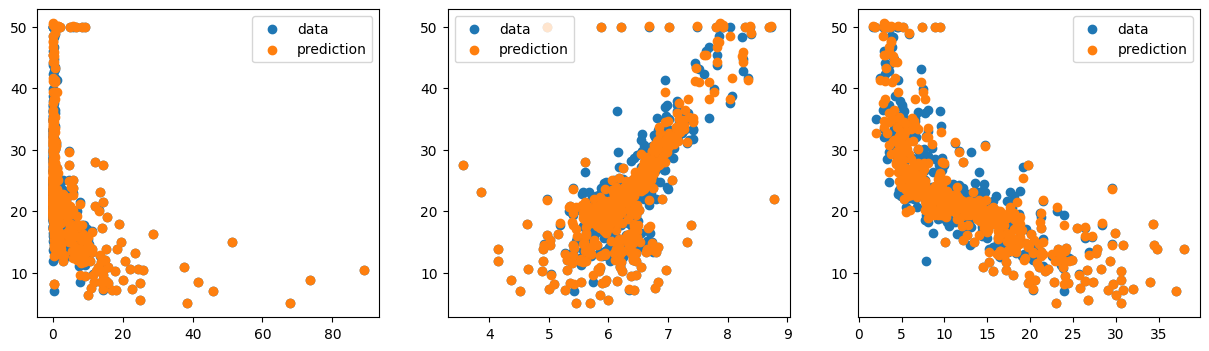

In [24]:
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False), # Can you calculate how many features this will result in? :)
    LinearRegression()
)

model.fit(X_subset, y)
print('mse = ', mean_squared_error(y, model.predict(X_subset)))

plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(X[c], y, label='data')
  plt.scatter(X[c], model.predict(X_subset), label='prediction')
  plt.legend()

# Splitting the data to train and validation parts

Looks like the fit from above is reasonable, right?

In fact, we cannot know this yet: we fitted and predicted on the same data. Let's split our dataset to get a more reasonable estimate of the prediction error.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=50, random_state=39)

In [27]:
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    LinearRegression()
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  3.4451675826275205
test mse =  123905559447690.7


That's quite an error we have on the test set!

Let's look at the prediction.

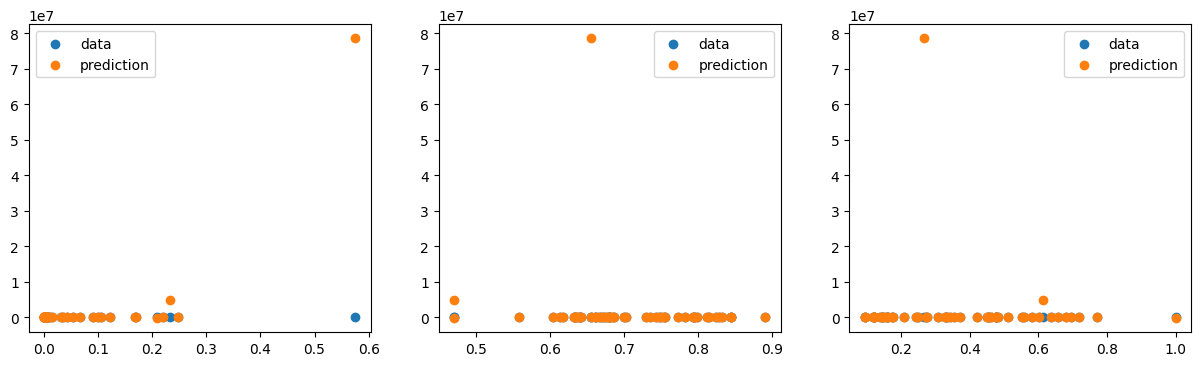

In [28]:
plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(X_test[c], y_test, label='data')
  plt.scatter(X_test[c], model.predict(X_test), label='prediction')
  plt.legend()

That's because our parameter values at the solution are enormous:

In [29]:
model.named_steps['linearregression'].coef_

array([ 1.99766848e+10,  2.34451662e+10,  1.09287477e+10, -1.22378613e+11,
       -1.82124851e+11, -5.52893663e+10, -1.07026906e+11, -1.02236005e+11,
       -1.96329216e+10, -1.73617529e+12,  9.38190672e+11,  1.29578707e+12,
        7.28275972e+11,  4.19570376e+11, -7.13503143e+09,  2.83842296e+11,
        4.16147401e+11,  1.67021016e+11,  1.44038392e+10, -2.72316540e+12,
        1.27244782e+13,  5.63191614e+12, -2.90830925e+12, -9.94824698e+12,
       -2.05168726e+12, -1.67014951e+12, -1.37503151e+12,  2.38715934e+11,
        1.54396040e+10, -4.81975039e+11, -9.62638916e+11, -6.04317858e+11,
       -1.16182933e+11,  2.07700563e+09, -5.50949199e+12,  2.05668747e+13,
        3.30189728e+12, -3.81767344e+13, -3.89187920e+13, -2.42199463e+12,
        4.57287221e+12,  3.13274542e+13,  1.45091411e+13,  4.19402684e+11,
        2.40467975e+12,  2.54175257e+12, -1.25759426e+12, -3.82369859e+11,
        1.02324226e+11,  5.43447253e+11,  1.38396378e+12,  1.20602350e+12,
        3.81393696e+11,  

# L2 regularization (ridge regression)

Let's regularize the solution!

In [30]:
from sklearn.linear_model import Ridge

In [31]:
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=1.)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  20.730542787957923
test mse =  13.099078251952276


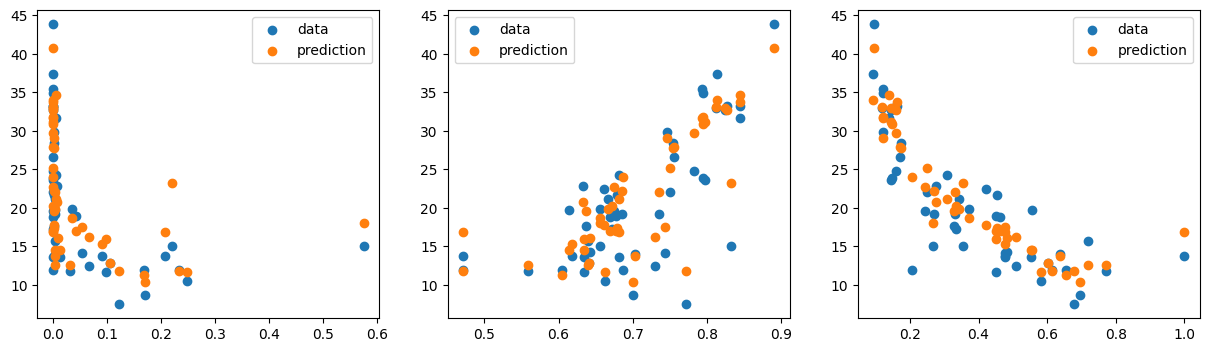

In [32]:
plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(X_test[c], y_test, label='data')
  plt.scatter(X_test[c], model.predict(X_test), label='prediction')
  plt.legend()

In [33]:
model.named_steps['ridge'].coef_

array([-8.19432282e-01,  6.96058073e-01, -1.02993537e+01, -3.17660586e-01,
       -1.51026234e+00, -3.57358157e+00,  3.88003254e+00, -1.02027936e+01,
        2.97680965e-01,  1.96558369e-01, -3.19837630e-01, -4.35602150e-01,
       -1.65818335e+00, -2.74511153e+00, -2.59731725e+00,  6.54810878e+00,
       -8.70010830e+00, -1.71878349e+00,  3.08150673e+00,  3.17459374e-01,
        1.10658344e-01,  9.00027256e-02, -2.87546252e-01, -3.16188950e-01,
       -3.69123244e-01, -1.60140392e+00, -2.07899220e+00, -1.86907130e+00,
       -1.75671781e+00,  7.84097799e+00, -6.93436203e+00, -2.36154836e+00,
        9.43249807e-01,  3.18241320e+00,  3.06844997e-01,  2.01054320e-01,
        1.76026657e-01,  5.52815158e-02,  6.37473081e-02,  7.04275056e-03,
       -2.46093197e-01, -2.32640684e-01, -2.38656204e-01, -3.25861641e-01,
       -1.48523680e+00, -1.56776781e+00, -1.34415981e+00, -1.22049075e+00,
       -1.24184693e+00,  7.74667369e+00, -5.35964170e+00, -2.36656710e+00,
       -8.85472649e-02,  

Now we'll study how losses and parameter values depend on the regularization power.

In [34]:
from tqdm import tqdm

100%|██████████| 90/90 [00:02<00:00, 36.67it/s]


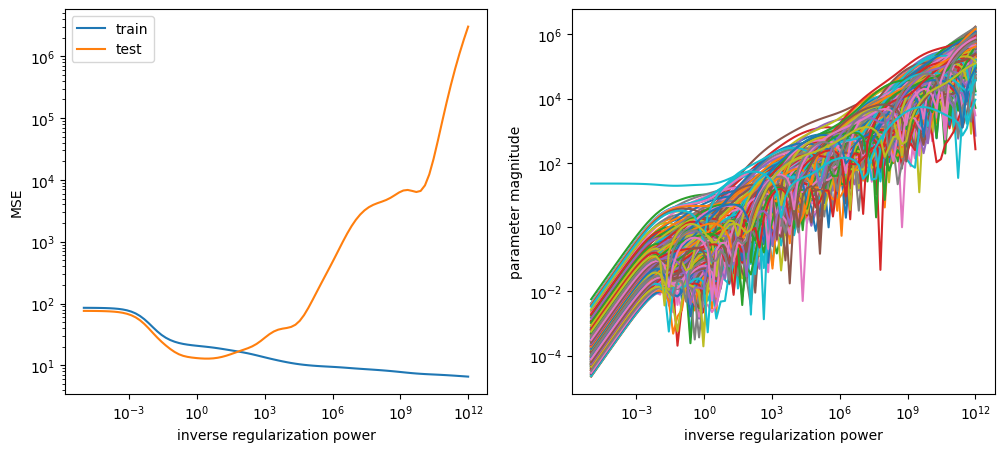

In [35]:
reg_powers = np.logspace(-12, 5, 18 * 5, base=10)


train_mse = []
test_mse = []

params = []

for alpha in tqdm(reg_powers):
  linear_model = Ridge(alpha=alpha)
  model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    linear_model
  )
  model.fit(X_train, y_train)

  params.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
  )

  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

params = np.array(params)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(1. / reg_powers, train_mse, label='train')
plt.plot(1. / reg_powers, test_mse, label='test')
plt.ylabel('MSE')
plt.xlabel('inverse regularization power')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(1. / reg_powers, np.abs(params));
plt.xlabel("inverse regularization power")
plt.ylabel("parameter magnitude")
plt.xscale('log')
plt.yscale('log')

# L1 regularization (lasso regression)

Here's a similar study with the Lasso regression:

In [36]:
from sklearn.linear_model import Lasso

100%|██████████| 30/30 [00:45<00:00,  1.50s/it]


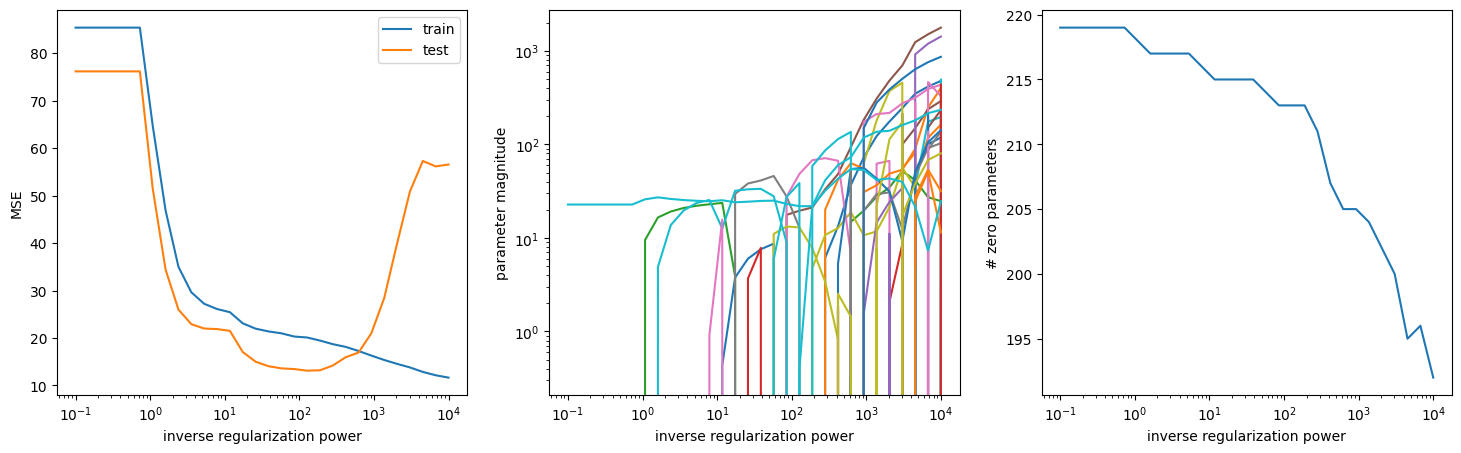

In [37]:
reg_powers = np.logspace(-4, 1, 6 * 5, base=10)

train_mse = []
test_mse = []

params = []

for alpha in tqdm(reg_powers):
  # Lasso doesn't have an analytic solution. Instead it
  # utilizes an iterative procedure, which for small
  # alpha values may take a while to converge.
  linear_model = Lasso(alpha=alpha, max_iter=1000000)
  model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    linear_model
  )
  model.fit(X_train, y_train)

  params.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
  )

  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

params = np.array(params)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)

plt.plot(1. / reg_powers, train_mse, label='train')
plt.plot(1. / reg_powers, test_mse, label='test')
plt.ylabel('MSE')
plt.xlabel('inverse regularization power')
plt.legend()
plt.xscale('log')

plt.subplot(1, 3, 2)
plt.plot(1. / reg_powers, np.abs(params));
plt.xlabel("inverse regularization power")
plt.ylabel("parameter magnitude")
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.plot(1. / reg_powers, np.isclose(params, 0.).sum(axis=1));
plt.xlabel("inverse regularization power")
plt.ylabel("# zero parameters")
plt.xscale('log')

# Bonus. What features are the most powerful?

Let's see what features are most powerful for a reasonably performing model (e.g. 1/alpha = 100) **(2 points)**:

In [59]:
model = make_pipeline(
  PolynomialFeatures(5, include_bias=False),
  Lasso(alpha=0.01, max_iter=1000000)
)
model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  20.20374315618383
test mse =  13.279369523609923


Some hints:
 - You can explore the feature names using `get_feature_names` method of the `PolynomialFeatures` class (plug the list of original feature names to get reasonable output).
 - `model.named_steps['polynomialfeatures']` to get the `PolynomialFeatures` preprocessor of our model.
 - `model.named_steps['lasso'].coef_` to get the parameters of the linear model
 - `np.argwhere` to find indices of non-zero elements of an array


In [58]:
model.named_steps['polynomialfeatures'].get_feature_names_out()[np.argwhere(model.named_steps['lasso'].coef_!=0)]

array([['CRIM LSTAT'],
       ['RM LSTAT'],
       ['RM^2 LSTAT'],
       ['LSTAT^3'],
       ['RM^4'],
       ['RM^5']], dtype=object)